In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
import matplotlib.pyplot as plt

In [2]:
### this is for running in local ###
try:
    os.environ['HTTP_PROXY']='http://185.46.212.90:80'
    os.environ['HTTPS_PROXY']='http://185.46.212.90:80'
    print ("proxy_exported")
except:
    None

In [3]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 4, kernel_size=3, padding=1)
#         self.bn1 = nn.BatchNorm2d(4)
#         self.dropout1 = nn.Dropout2d(p=0.01)

#         self.conv2 = nn.Conv2d(4, 8, kernel_size=3, padding=1)
#         self.bn2 = nn.BatchNorm2d(8)
#         self.dropout2 = nn.Dropout2d(p=0.01)

#         self.pool1 = nn.MaxPool2d(2, 2)

#         self.conv3 = nn.Conv2d(8, 16, 3, padding=1)
#         self.bn3 = nn.BatchNorm2d(16)
#         self.dropout3 = nn.Dropout2d(p=0.01)

#         self.conv4 = nn.Conv2d(16, 32, 3, padding=1)
#         self.bn4 = nn.BatchNorm2d(32)
#         self.dropout4 = nn.Dropout2d(p=0.01)

#         self.pool2 = nn.MaxPool2d(2, 2)

#         self.avgpool = nn.AdaptiveAvgPool2d(1)  # Global Average Pooling

#         self.fc = nn.Linear(32, 10)

#     def forward(self, x):
#         x = self.dropout1(self.bn1(F.relu(self.conv1(x))))
#         x = self.pool1(self.dropout2(self.bn2(F.relu(self.conv2(x)))))
#         x = self.dropout3(self.bn3(F.relu(self.conv3(x))))
#         x = self.pool2(self.dropout4(self.bn4(F.relu(self.conv4(x)))))

#         x = self.avgpool(x)
#         x = x.view(-1, 32)

#         x = self.fc(x)
#         x = F.log_softmax(x, dim=1)

#         return x

# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")
# model = Net().to(device)
# summary(model, input_size=(1, 28, 28))



class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=128,
        kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(num_features=128)
        
        self.tns1 = nn.Conv2d(in_channels=128, out_channels=4,
        kernel_size=1, padding=1)
        
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=16,
        kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(num_features=16)
        
        self.pool1 = nn.MaxPool2d(2, 2)
        
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=16,
        kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(num_features=16)
        
        self.conv4 = nn.Conv2d(in_channels=16, out_channels=32,
        kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(num_features=32)
       
        self.pool2 = nn.MaxPool2d(2, 2)
        
        self.tns2 = nn.Conv2d(in_channels=32, out_channels=16,
        kernel_size=1, padding=1)
        
        self.conv5 = nn.Conv2d(in_channels=16, out_channels=16,
        kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(num_features=16)
        
        self.conv6 = nn.Conv2d(in_channels=16, out_channels=32,
        kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(num_features=32)
        
        self.conv7 = nn.Conv2d(in_channels=32, out_channels=10,
        kernel_size=1, padding=1)
        self.gpool = nn.AvgPool2d(kernel_size=7)
        self.drop = nn.Dropout2d(0.1)

    
    def forward(self, x):
        x = self.tns1(self.drop(self.bn1(F.relu(self.conv1(x)))))
        x = self.drop(self.bn2(F.relu(self.conv2(x))))
        x = self.pool1(x)
        x = self.drop(self.bn3(F.relu(self.conv3(x))))
        x = self.drop(self.bn4(F.relu(self.conv4(x))))
        x = self.tns2(self.pool2(x))
        x = self.drop(self.bn5(F.relu(self.conv5(x))))
        x = self.drop(self.bn6(F.relu(self.conv6(x))))
        x = self.conv7(x)
        x = self.gpool(x)
        x = x.view(-1, 10)
        return F.log_softmax(x)


In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 128, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.dropout1 = nn.Dropout2d(p=0.01)

        self.tns_conv1 = nn.Conv2d(128, 4, kernel_size=1, padding=1)
        
        self.conv2 = nn.Conv2d(4, 16, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.dropout2 = nn.Dropout2d(p=0.01)
        

        self.pool1 = nn.MaxPool2d(2, 2)

        
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(16)
        self.dropout3 = nn.Dropout2d(p=0.01)
        
        self.conv4 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(32)
        self.dropout4 = nn.Dropout2d(p=0.01)   
        
        self.pool2 = nn.MaxPool2d(2, 2)
        
        self.tns_conv2 = nn.Conv2d(32, 16, kernel_size=1, padding=1)
    
        
        self.conv5 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(16)
        self.dropout5 = nn.Dropout2d(p=0.01) 
        
        self.conv6 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(32)
        self.dropout6 = nn.Dropout2d(p=0.01) 
        
        
        self.conv7 = nn.Conv2d(32, 10, kernel_size=1, padding=1)

        
        
        self.gap = nn.AdaptiveAvgPool2d(1)
        

    def forward(self, x):
        x = self.dropout1(self.bn1(F.relu(self.conv1(x))))
        x = self.tns_conv1(x)
        x = self.dropout2(self.bn2(F.relu(self.conv2(x))))
        x = self.pool1(x)
        x = self.dropout3(self.bn3(F.relu(self.conv3(x))))
        x = self.dropout4(self.bn4(F.relu(self.conv4(x))))
        x = self.pool2(x)
        x = self.tns_conv2(x)
        x = self.dropout5(self.bn5(F.relu(self.conv5(x))))
        x = self.dropout6(self.bn6(F.relu(self.conv6(x))))
        x = self.conv7(x)
        x = self.gap(x)
        
        x = x.view(-1, 10)
        return F.log_softmax(x)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 28, 28]           1,280
       BatchNorm2d-2          [-1, 128, 28, 28]             256
         Dropout2d-3          [-1, 128, 28, 28]               0
            Conv2d-4            [-1, 4, 30, 30]             516
            Conv2d-5           [-1, 16, 30, 30]             592
       BatchNorm2d-6           [-1, 16, 30, 30]              32
         Dropout2d-7           [-1, 16, 30, 30]               0
         MaxPool2d-8           [-1, 16, 15, 15]               0
            Conv2d-9           [-1, 16, 15, 15]           2,320
      BatchNorm2d-10           [-1, 16, 15, 15]              32
        Dropout2d-11           [-1, 16, 15, 15]               0
           Conv2d-12           [-1, 32, 15, 15]           4,640
      BatchNorm2d-13           [-1, 32, 15, 15]              64
        Dropout2d-14           [-1, 32,

/tmp/ipykernel_36407/2135698860.py:66: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 128, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.dropout1 = nn.Dropout2d(p=0.05)

        self.tns_conv1 = nn.Conv2d(128, 8, kernel_size=1, padding=1)
        
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.dropout2 = nn.Dropout2d(p=0.05)
        

        self.pool1 = nn.MaxPool2d(2, 2)

        
        self.conv3 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(16)
        self.dropout3 = nn.Dropout2d(p=0.05)
        
        self.conv4 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(32)
        self.dropout4 = nn.Dropout2d(p=0.05)   
        
        self.pool2 = nn.MaxPool2d(2, 2)
        
        self.tns_conv2 = nn.Conv2d(32, 16, kernel_size=1, padding=1)
    
        
        self.conv5 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(16)
        self.dropout5 = nn.Dropout2d(p=0.05) 
        
        self.conv6 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(32)
        self.dropout6 = nn.Dropout2d(p=0.05) 
        
        
        self.conv7 = nn.Conv2d(32, 10, kernel_size=1, padding=1)

        
        
        self.gap = nn.AdaptiveAvgPool2d(1)
        

    def forward(self, x):
        x = self.dropout1(self.bn1(F.relu(self.conv1(x))))
        x = self.tns_conv1(x)
        x = self.dropout2(self.bn2(F.relu(self.conv2(x))))
        x = self.pool1(x)
        x = self.dropout3(self.bn3(F.relu(self.conv3(x))))
        x = self.dropout4(self.bn4(F.relu(self.conv4(x))))
        x = self.pool2(x)
        x = self.tns_conv2(x)
        x = self.dropout5(self.bn5(F.relu(self.conv5(x))))
        x = self.dropout6(self.bn6(F.relu(self.conv6(x))))
        x = self.conv7(x)
        x = self.gap(x)
        
        x = x.view(-1, 10)
        return F.log_softmax(x)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 28, 28]           1,280
       BatchNorm2d-2          [-1, 128, 28, 28]             256
         Dropout2d-3          [-1, 128, 28, 28]               0
            Conv2d-4            [-1, 8, 30, 30]           1,032
            Conv2d-5           [-1, 16, 30, 30]           1,168
       BatchNorm2d-6           [-1, 16, 30, 30]              32
         Dropout2d-7           [-1, 16, 30, 30]               0
         MaxPool2d-8           [-1, 16, 15, 15]               0
            Conv2d-9           [-1, 16, 15, 15]           2,320
      BatchNorm2d-10           [-1, 16, 15, 15]              32
        Dropout2d-11           [-1, 16, 15, 15]               0
           Conv2d-12           [-1, 32, 15, 15]           4,640
      BatchNorm2d-13           [-1, 32, 15, 15]              64
        Dropout2d-14           [-1, 32,

/tmp/ipykernel_36407/3257680800.py:66: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [6]:
torch.manual_seed(1)
batch_size = 128*4

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


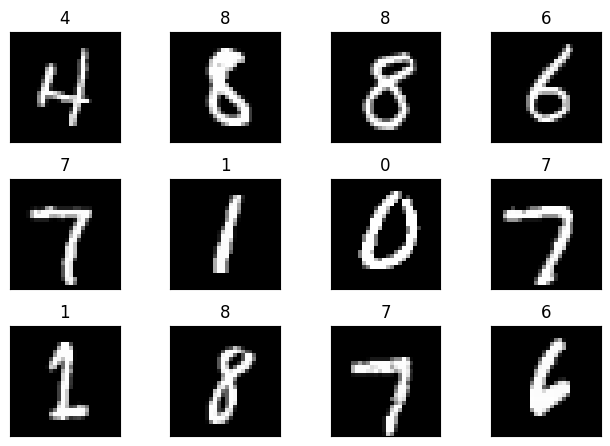

In [7]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [8]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [9]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)  #include to reduce learning rate

num_epochs = 20

for epoch in range(1, num_epochs+1):
    print ("#epoch", f'{epoch}')
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    #scheduler.step()

#epoch 1


  0% 0/118 [00:00<?, ?it/s]/tmp/ipykernel_36407/3257680800.py:66: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
loss=0.15526869893074036 batch_id=117: 100% 118/118 [00:09<00:00, 13.10it/s]



Test set: Average loss: 0.1099, Accuracy: 9690/10000 (96.90%)

#epoch 2


loss=0.08858007192611694 batch_id=117: 100% 118/118 [00:08<00:00, 13.16it/s]



Test set: Average loss: 0.0764, Accuracy: 9745/10000 (97.45%)

#epoch 3


loss=0.09641000628471375 batch_id=117: 100% 118/118 [00:08<00:00, 13.69it/s] 



Test set: Average loss: 0.0496, Accuracy: 9860/10000 (98.60%)

#epoch 4


loss=0.02469770796597004 batch_id=117: 100% 118/118 [00:08<00:00, 13.58it/s] 



Test set: Average loss: 0.0521, Accuracy: 9822/10000 (98.22%)

#epoch 5


loss=0.06552869826555252 batch_id=117: 100% 118/118 [00:08<00:00, 13.53it/s] 



Test set: Average loss: 0.0358, Accuracy: 9882/10000 (98.82%)

#epoch 6


loss=0.07001551985740662 batch_id=117: 100% 118/118 [00:08<00:00, 13.63it/s] 



Test set: Average loss: 0.0373, Accuracy: 9881/10000 (98.81%)

#epoch 7


loss=0.04734927788376808 batch_id=117: 100% 118/118 [00:08<00:00, 13.26it/s] 



Test set: Average loss: 0.0355, Accuracy: 9894/10000 (98.94%)

#epoch 8


loss=0.038803815841674805 batch_id=117: 100% 118/118 [00:08<00:00, 13.35it/s]



Test set: Average loss: 0.0285, Accuracy: 9910/10000 (99.10%)

#epoch 9


loss=0.027869613841176033 batch_id=117: 100% 118/118 [00:08<00:00, 13.60it/s]



Test set: Average loss: 0.0288, Accuracy: 9904/10000 (99.04%)

#epoch 10


loss=0.008248862810432911 batch_id=117: 100% 118/118 [00:08<00:00, 13.56it/s]



Test set: Average loss: 0.0281, Accuracy: 9904/10000 (99.04%)

#epoch 11


loss=0.03867989405989647 batch_id=117: 100% 118/118 [00:08<00:00, 13.61it/s] 



Test set: Average loss: 0.0299, Accuracy: 9903/10000 (99.03%)

#epoch 12


loss=0.10681498050689697 batch_id=117: 100% 118/118 [00:08<00:00, 13.50it/s] 



Test set: Average loss: 0.0235, Accuracy: 9925/10000 (99.25%)

#epoch 13


loss=0.04783479496836662 batch_id=117: 100% 118/118 [00:08<00:00, 13.59it/s] 



Test set: Average loss: 0.0249, Accuracy: 9915/10000 (99.15%)

#epoch 14


loss=0.012179523706436157 batch_id=117: 100% 118/118 [00:08<00:00, 13.40it/s]



Test set: Average loss: 0.0195, Accuracy: 9931/10000 (99.31%)

#epoch 15


loss=0.04689979553222656 batch_id=117: 100% 118/118 [00:08<00:00, 13.44it/s] 



Test set: Average loss: 0.0229, Accuracy: 9916/10000 (99.16%)

#epoch 16


loss=0.02021927759051323 batch_id=117: 100% 118/118 [00:08<00:00, 13.71it/s] 



Test set: Average loss: 0.0218, Accuracy: 9934/10000 (99.34%)

#epoch 17


loss=0.025678804144263268 batch_id=117: 100% 118/118 [00:08<00:00, 13.58it/s]



Test set: Average loss: 0.0195, Accuracy: 9939/10000 (99.39%)

#epoch 18


loss=0.05864516273140907 batch_id=117: 100% 118/118 [00:08<00:00, 13.60it/s] 



Test set: Average loss: 0.0218, Accuracy: 9939/10000 (99.39%)

#epoch 19


loss=0.010900513269007206 batch_id=117: 100% 118/118 [00:08<00:00, 13.59it/s]



Test set: Average loss: 0.0218, Accuracy: 9928/10000 (99.28%)

#epoch 20


loss=0.005078038666397333 batch_id=117: 100% 118/118 [00:08<00:00, 13.67it/s]



Test set: Average loss: 0.0199, Accuracy: 9933/10000 (99.33%)

